#### Bibliotecas

In [294]:
import os
import pandas as pd
import numpy as np

#### Variáveis de Ambiente

In [295]:
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'dados','dados.csv')
base = pd.read_csv(file_path)

### Análise Exploratória

In [296]:
# Exibe a quantidade de registros e colunas da base
base.shape

(76840, 7)

In [297]:
# Exibe a lista de colunas da base
base.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [298]:
# Exibe a quantidade de valores nulos em cada coluna
base.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [299]:
# Exibe informações gerais sobre a base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [300]:
# Exibe os cinco primeiros registros da base
base.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [301]:
# Exibe os cinco últimos registros da base
base.tail()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


In [302]:
# Exibe o resumo estatístico dos dados
base.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Variáveis 

#### Variáveis Qualitativas Nominais

In [303]:
sorted(base['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [304]:
sexo ={
        0: 'Masculino',
        1: 'Feminino'}

print(base['Sexo'].unique())

for chave, valor in sexo.items():
    print(f"Sexo: {chave}, Valor: {valor}")

[0 1]
Sexo: 0, Valor: Masculino
Sexo: 1, Valor: Feminino


In [305]:
cor = { 
        0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda'}

print(sorted(base['Cor'].unique()))

for chave, valor in cor.items():
    print(f"Cor: {chave}, Valor: {valor}")

[0, 2, 4, 6, 8]
Cor: 0, Valor: Indígena
Cor: 2, Valor: Branca
Cor: 4, Valor: Preta
Cor: 6, Valor: Amarela
Cor: 8, Valor: Parda


#### Variáveis Qualitativas Ordinais

In [306]:
sorted(base['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#### Variáveis Quantitativas Discreta

In [307]:
print("Campo 'idade' de %s até %s anos" % (base['Idade'].min(), base['Idade'].max())) 

Campo 'idade' de 13 até 99 anos


#### Variáveis Quantitativas Continuas

In [308]:
print("Campo 'Altura' de %s até %s metros" % (base['Altura'].min(), base['Altura'].max())) 

Campo 'Altura' de 1.339244614 até 2.028496765 metros


In [309]:
print("Campo 'Renda' de %s até %s R$" % (base['Renda'].min(), base['Renda'].max())) 

Campo 'Renda' de 0 até 200000 R$


### Distribuição de Frequências

#### Distribuição de Frequências Qualitativas

In [310]:
frequencia_sexo = base['Sexo'].value_counts()
porcentual_sexo = base['Sexo'].value_counts(normalize=True) * 100
dist_freq_sexo = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentual (%)': porcentual_sexo})
dist_freq_sexo.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_sexo.rename_axis('Sexo', axis = 'columns', inplace=True)
dist_freq_sexo

Sexo,Frequência,Porcentual (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [311]:
frequencia_estado = base['UF'].value_counts()
porcentual_estado = base['UF'].value_counts(normalize=True) * 100
dist_freq_estado = pd.DataFrame({'Frequência': frequencia_estado, 'Porcentual (%)': porcentual_estado})
dist_freq_estado.rename_axis('UF', axis = 'columns', inplace=True)
dist_freq_estado

UF,Frequência,Porcentual (%)
35,8544,11.119209
31,7686,10.002603
43,6322,8.227486
29,5717,7.440135
33,5556,7.230609
15,4449,5.789953
41,4356,5.668922
26,3820,4.971369
52,3478,4.526288
23,3359,4.371421


In [312]:
cor = { 
        0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda'}

frequencia_cor = base['Cor'].value_counts()
porcentual_cor = base['Cor'].value_counts(normalize=True) * 100
dist_freq_cor = pd.DataFrame({'Frequência':frequencia_cor, 'Porcentual (%)':porcentual_cor})
dist_freq_cor.rename(index = cor, inplace=True)
dist_freq_cor.rename_axis('Cor', axis = 'columns', inplace=True)
dist_freq_cor

Cor,Frequência,Porcentual (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


##### Cruzamento entre variáveis
- [Documentação - pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)


In [313]:
# Sexo & Cor
sexo ={
        0: 'Masculino',
        1: 'Feminino'}

cor = { 
        0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

frequencia_cor_e_sexo = pd.crosstab(base['Sexo'], 
                                    base['Cor'],)
frequencia_cor_e_sexo.rename(index=sexo, inplace=True)
frequencia_cor_e_sexo.rename(columns=cor, inplace=True)
frequencia_cor_e_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [314]:
# Porcentual Sexo & Cor
porcentual_cor_e_sexo = pd.crosstab(base.Sexo, 
                         base.Cor,
                         normalize=True) * 100
porcentual_cor_e_sexo.rename(index=sexo, inplace=True)
porcentual_cor_e_sexo.rename(columns=cor, inplace=True)
porcentual_cor_e_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [315]:
# Média de renda por Sexo & Cor
media_renda_por_cor_e_sexo = pd.crosstab(base['Sexo'], 
                                         base['Cor'],
                                         aggfunc='mean',
                                         values = base['Renda'])
media_renda_por_cor_e_sexo.rename(index=sexo, inplace=True)
media_renda_por_cor_e_sexo.rename(columns=cor, inplace=True)
media_renda_por_cor_e_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [316]:
# Cor & UF
frequencia_cor_e_uf = pd.crosstab(base['Cor'], 
                                  base['UF'])
frequencia_cor_e_uf.rename(index=cor, inplace=True)
frequencia_cor_e_uf

UF,11,12,13,14,15,16,17,21,22,23,...,32,33,35,41,42,43,50,51,52,53
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,3,27,58,20,44,1,0,9,1,14,...,5,12,27,6,5,27,7,6,5,4
Branca,492,190,343,96,790,104,312,343,233,879,...,641,2488,5047,2966,1930,5083,639,614,1283,861
Preta,165,92,123,61,466,50,164,269,151,186,...,181,927,705,193,52,444,82,168,327,233
Amarela,9,2,6,1,14,3,4,1,0,12,...,1,19,120,53,3,9,14,8,31,12
Parda,868,626,1676,362,3135,354,826,1165,826,2268,...,683,2110,2645,1138,285,759,698,1004,1832,944


In [317]:
# Cor & UF
porcentual_cor_e_uf = pd.crosstab(base['Cor'], 
                                  base['UF'],
                                  normalize=True)*100
porcentual_cor_e_uf.rename(index=cor, inplace=True)
porcentual_cor_e_uf

UF,11,12,13,14,15,16,17,21,22,23,...,32,33,35,41,42,43,50,51,52,53
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,0.003904,0.035138,0.075482,0.026028,0.057262,0.001301,0.000000,0.011713,0.001301,0.018220,...,0.006507,0.015617,0.035138,0.007808,0.006507,0.035138,0.009110,0.007808,0.006507,0.005206
Branca,0.640292,0.247267,0.446382,0.124935,1.028110,0.135346,0.406039,0.446382,0.303227,1.143935,...,0.834201,3.237897,6.568194,3.859969,2.511713,6.615044,0.831598,0.799063,1.669703,1.120510
Preta,0.214732,0.119729,0.160073,0.079386,0.606455,0.065070,0.213431,0.350078,0.196512,0.242061,...,0.235554,1.206403,0.917491,0.251171,0.067673,0.577824,0.106715,0.218636,0.425560,0.303227
Amarela,0.011713,0.002603,0.007808,0.001301,0.018220,0.003904,0.005206,0.001301,0.000000,0.015617,...,0.001301,0.024727,0.156169,0.068974,0.003904,0.011713,0.018220,0.010411,0.040344,0.015617
Parda,1.129620,0.814680,2.181156,0.471109,4.079906,0.460698,1.074961,1.516137,1.074961,2.951588,...,0.888860,2.745966,3.442218,1.480999,0.370901,0.987767,0.908381,1.306611,2.384175,1.228527


In [318]:
# Média de renda por Cor & UF
frequencia_cor_e_uf = pd.crosstab(base['Cor'], 
                                  base['UF'],
                                  aggfunc='mean',
                                  values=base['Renda'])
frequencia_cor_e_uf.rename(index=cor, inplace=True)
frequencia_cor_e_uf

UF,11,12,13,14,15,16,17,21,22,23,...,32,33,35,41,42,43,50,51,52,53
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,2800.000000,385.296296,632.965517,978.200000,716.363636,998.000000,NaN,350.000000,788.000000,1774.428571,...,1469.600000,11642.750000,2577.777778,1971.000000,2240.000000,1021.962963,1306.142857,1925.000000,1082.600000,975.000000
Branca,2108.609756,2326.710526,2049.029155,2412.812500,1968.175949,2839.182692,2572.544872,1683.049563,1585.742489,1634.653015,...,2623.388456,3418.863344,3105.312463,2790.686446,2588.100000,2475.709030,2884.402191,2678.872964,2488.266563,5255.058072
Preta,1736.709091,1187.010870,1645.715447,1535.114754,1232.555794,1554.700000,1318.341463,746.327138,743.715232,1037.215054,...,1475.237569,1542.121899,2014.902128,2090.683938,1595.442308,1723.835586,1500.841463,1822.119048,1584.633028,2555.583691
Amarela,3176.666667,2650.000000,2500.000000,3000.000000,5824.142857,1266.666667,2344.000000,1900.000000,NaN,1480.500000,...,4000.000000,3332.526316,4951.466667,4647.490566,6530.000000,4177.777778,4794.285714,3397.875000,3614.322581,5633.333333
Parda,1601.244240,1348.602236,1331.148568,1699.729282,1270.240829,1624.872881,1555.486683,891.525322,991.179177,1121.918430,...,1613.335286,1768.391469,1808.383743,1691.107206,1797.926316,1609.783926,1741.669054,1838.145418,1697.092795,3730.316737


#### Distribuição de Frequências Quantitativas

##### Categorização de Variável Quantitativa

- [Documentação - pd.cut](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html)

Como a pesquisa PNAD na qual baseamos nossos dados foi realizada em 2015, o valor do salário mínimo era de R$788,00.

- **A**: acima de 20 salários mínimos;
- **B**: entre 10 e 20 salários mínimos;
- **C**: entre 4 a 10 salários mínimos;
- **D**: entre 2 a 4 salários mínimos;
- **E**: de zero até 2 salários mínimos.

Com base nisso, faremos o cálculo dos valores em reais de cada classificação apresentada.

- **A**: acima de R$15.760,00;
- **B**: de R$7.880,00 até R$15.760,00;
- **C**: de R$3.152,00 até R$ 7.880,00;
- **D**: de R$1.576,00 até R$3.152,00;
- **E**: de zero até R$1.576,00.



In [319]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

renda_por_classe = pd.cut(x = base['Renda'],
                          bins = classes,
                          labels = labels,
                          include_lowest = True)

frequencia_renda_por_classe = pd.value_counts(renda_por_classe)
porcentual_renda_por_classe = pd.value_counts(renda_por_classe, normalize=True)
dist_freq_renda_por_classe = pd.DataFrame({'Frequência': frequencia_renda_por_classe, 
                                           'Porcentual (%)': porcentual_renda_por_classe})
dist_freq_renda_por_classe.sort_index(ascending = False)

,Frequência,Porcentual (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


Através da **Regra de Sturges** podemos criar as tabelas de categorização quando não temos classes organizadas

- k = 1 + (10/3 log₁₀ n)
- n = Número de observações (n° de registros = base.shape[0])

In [320]:
n = base.shape[0]
k = 1 + (10 /3) * np.log10(n)
k = int(k)
k

17

In [321]:
frequencia_por_amplitude_fixa_por_amplitude_fixa = pd.value_counts(
    pd.cut(
        x=base['Renda'],
        bins=k,
        include_lowest=True
    ),
    sort=False
)

porcentual_por_amplitude_fixa = pd.value_counts(
    pd.cut(
        x=base['Renda'],
        bins=k,
        include_lowest=True
    ),
    sort=False,
    normalize=True
)

dist_freq_renda_por_amplitude_fixa = pd.DataFrame({'Frequência': frequencia_por_amplitude_fixa_por_amplitude_fixa, 
                                                   'Porcentual (%)': porcentual_por_amplitude_fixa})

dist_freq_renda_por_amplitude_fixa.rename_axis('Amplitude Fixa', axis = 'columns', inplace=True)
dist_freq_renda_por_amplitude_fixa

Amplitude Fixa,Frequência,Porcentual (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


In [322]:
# Criação das labels
classes_por_amplitude_fixa = [0, 11764, 23529, 35294, 47058, 
                             58823, 70588, 82352, 94117, 105882, 
                             117647, 129411, 141176, 152941, 164705, 
                             176470, 188235, 200000, 2000001]

labels_por_amplitude_fixa = ['R', 'Q', 'P', 'O', 'N', 'M', 'L', 'K', 
                              'J', 'I', 'H', 'G', 'F', 'E', 'D', 
                              'C', 'B', 'A']

frequencia_por_amplitude_fixa_com_labels = pd.value_counts(
    pd.cut(
        x=base['Renda'],
        bins=classes_por_amplitude_fixa,
        labels=labels_por_amplitude_fixa,
        include_lowest=True
    ),
    sort=False
)

porcentual_por_amplitude_fixa_com_labels = pd.value_counts(
    pd.cut(
        x=base['Renda'],
        bins=classes_por_amplitude_fixa,
        labels=labels_por_amplitude_fixa,
        include_lowest=True
    ),
    sort=False,
    normalize=True
) * 100

dist_freq_renda_por_amplitude_fixa_com_labels = pd.DataFrame({'Frequência': frequencia_por_amplitude_fixa_com_labels, 
                                                            'Porcentual (%)': porcentual_por_amplitude_fixa_com_labels})

dist_freq_renda_por_amplitude_fixa_com_labels.rename_axis('Amplitude Fixa', axis = 'columns', inplace=True)
dist_freq_renda_por_amplitude_fixa_com_labels.sort_index(ascending = False)

Amplitude Fixa,Frequência,Porcentual (%)
A,0,0.000000
B,3,0.003904
C,0,0.000000
D,0,0.000000
E,0,0.000000
F,0,0.000000
G,0,0.000000
H,1,0.001301
I,0,0.000000
J,6,0.007808


#### Histograma

/tmp/ipykernel_182542/2130382011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(base.Altura, kde = False)


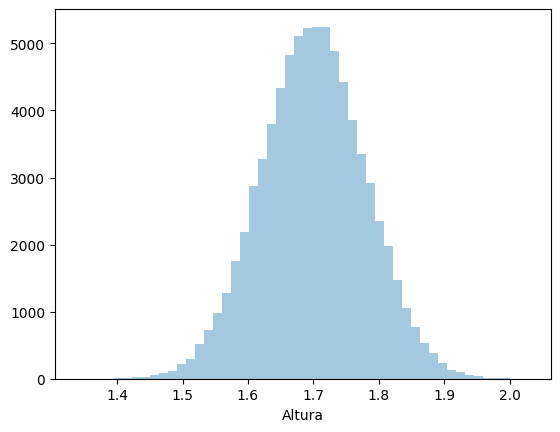

In [323]:
import seaborn as sns
ax = sns.distplot(base.Altura, kde = False)

/tmp/ipykernel_182542/876773135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(base.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros'>

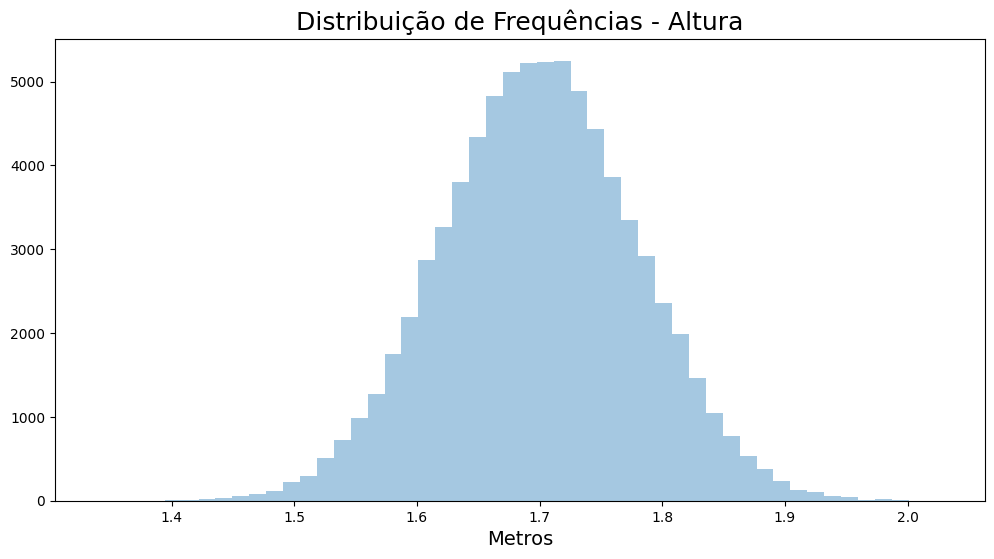

In [324]:
ax = sns.distplot(base.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax  

In [325]:
ax = sns.distplot(base.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/tmp/ipykernel_182542/717628677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(base.Altura)
